In [5]:
import numpy as np
import pandas as pd
import os, pdb # 
import scipy.stats # Conatins large number of propability distributions
                  # and library of statistics
import warnings

from astropy.io import fits, ascii
from astropy.table import Table, hstack

import h5py

In [6]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, ScalarFormatter
%matplotlib inline

In [17]:
import colossus
import colossus.halo
from colossus.cosmology import cosmology
from colossus.halo import mass_defs, concentration
from colossus.lss import mass_function
from colossus.halo import mass_adv

In [8]:
cosmology.setCosmology('planck15')

In [86]:
def mhalo_relations(mvir, halodef='200c', redshift=0.0):
    conc = concentration.concentration(mvir, 'vir', redshift)
    mnew, Rnew, cnew = mass_defs.changeMassDefinition(mvir, conc, redshift, 'vir', halodef)
    return np.log10(mnew)

In [87]:
def qa_mhalo_relations(minmass=11, maxmass=15.3, dm=0.1):
    logmvir = np.arange(minmass, maxmass, dm)
    mvir = 10**logmvir
    
    logm200c = mhalo_relations(mvir, '200c')
    logm500c = mhalo_relations(mvir, '500c')
    
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(logmvir, logm200c-logmvir, 'blue', lw=2, ls='-', label='M(200c)')
    ax.plot(logmvir, logm500c-logmvir, 'orange', lw=2, ls='--', label='M(500c)')
    #ax.fill_between(logmvir, logm500c-0.1, logm500c+0.1, color='orange', 
    #                alpha=0.5, label='M(500c)')
    ax.plot(logmvir, logmvir*0, 'gray', alpha=0.5, ls='-', label='1-1 relation')
    ax.set_xlim(minmass, maxmass-dm)
    #ax.set_ylim(minmass, maxmass-dm)
    ax.set_ylim(-0.5, 0.5)
    ax.margins(0)
    ax.legend(loc='upper left')

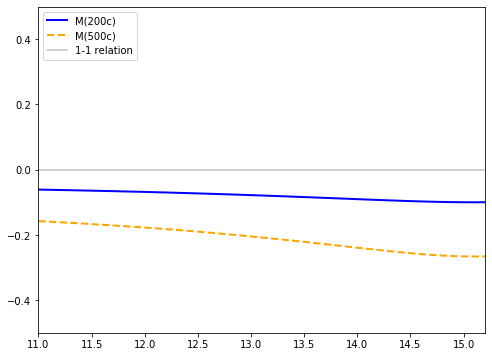

In [88]:
qa_mhalo_relations()

In [ ]:
H = ['M200c', 'M200m', 'M500c', 'M500m']
H2 = [2E13, 2E14, 2E20, 2E25]
mvir = 10**np.arange(11.0, 15.5, 0.1)
m1, m2, m3= mass_defs.changeMassDefinition(mvir, 3.5, 0.0, 'vir', '200c')

In [ ]:
m1

In [ ]:
fig, ax = plt.subplots()
ax.plot(mvir, m1)
ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)
ax.loglog()
ax.set_xlim(1E11, 4E15)
# ax.set_ylim(1E-7, 1E-1,)
ax.set_title('Comparing Halo Mass Definitions')
# ax.legend(loc='lower left', frameon=True)

plt.savefig('DarkMatterHalo3')

In [ ]:
m2

In [ ]:
# steeper

fig, ax = plt.subplots()
ax.plot(mvir, m2)
ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)
ax.loglog()
ax.set_xlim(1E11, 4E15)
# ax.set_ylim(1E-7, 1E-1,)
ax.set_title('Comparing Halo Mass Definitions')
# ax.legend(loc='lower left', frameon=True)\
plt.savefig('DarkMatterHalo2')

In [ ]:
m3

In [ ]:
fig, ax = plt.subplots()
ax.plot(mvir, m3)
ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)
ax.loglog()
ax.set_xlim(1E11, 4E15)
# ax.set_ylim(1E-7, 1E-1,)
ax.set_title('Comparing Halo Mass Definitions')
# ax.legend(loc='lower left', frameon=True)

plt.savefig('DarkMatterHalo3')

In [ ]:
# dir('cosmology')

In [ ]:
# list(['cosmology'])

Note:

-slopes should differ slightly since we are comparing the halo mass on a theoretical view point
-the concentration is dependent on the halo mass
-use the mass definition to comapare the virial mass
-refer to "stellar mass-halo mass relation" on how to import the mass_defs
-know halo concentration!!!(density) 
-galaxies today have a smaller density

In [ ]:
# 3 graphs combined


H = ['M200c', 'M200m', 'M500c', 'M500m']
H2 = [2E13, 2E14, 2E20, 2E25]
mvir = 10**np.arange(11.0, 15.5, 0.1)
m7, m8, m9= mass_defs.changeMassDefinition(mvir, 3.5, 0.0, 'vir', '200c')

In [ ]:
fig, ax = plt.subplots()
ax.plot(mvir, m1, label='m1')
ax.plot(mvir, m2, label='m2')
ax.plot(mvir, m3, label='m3')
ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)
ax.loglog()
ax.set_xlim(1E11, 1E15)
ax.set_title('Comparing Halo Mass Definitions')
ax.legend(loc='center right', frameon=True)
plt.savefig('DMH1')

In [ ]:
z = [0.0, 1.0, 2.0, 3.0, 5.0, 11.0]
M = 10**np.arange(11.0, 15.5, 0.1)
y1 = M
y2 = mvir

In [ ]:
# def halomass2():
z = [i for i in range(12) ]
# y = [i for i in x]
# plt.plot(x,y)
plt.plot(m1)
plt.plot(m2)
plt.plot(m3)

In [ ]:
H = ['M200c', 'M200m', 'M500c', 'M500m']
H2 = [2E13, 2E14, 2E20, 2E25]
mvir = 10**np.arange(11.0, 15.5, 0.1)
m7, m8, m9= mass_defs.changeMassDefinition(mvir,3.5, 11.1, 'vir', '500c')

In [ ]:
fig, ax = plt.subplots()
ax.plot(mvir, m7, label='m7')
ax.plot(mvir, m8, label='m8')
ax.plot(mvir, m9, label='m9')
ax.plot(H)
ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)
ax.loglog()
ax.set_xlim(1E11, 1E15)
ax.set_title('Comparing Halo Mass Definitions')
ax.legend(loc='center right', frameon=True)
plt.savefig('DMH1')

In [ ]:
z = [0.0, 3.0, 7.0, 11.0]
M = 10**np.arange(11.0, 15.5, 0.1)

ax.plot(z)
ax.plot(M)
ax.plot('M500m')
plt.loglog()
# plt.xlim(1E11, 4E15)
# plt.ylim(1E7, 1E1)


ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)


for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '500m', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

In [ ]:
z = [0.0, 3.0, 7.0, 11.0]
M = 10**np.arange(11.0, 15.5, 0.1)

ax.plot(z)
ax.plot(M)
ax.plot('M200c')
plt.loglog()
# plt.xlim(1E11, 4E15)
# plt.ylim(1E7, 1E1)

ax.set_xlabel('log Mvirial', fontsize=12)
ax.set_ylabel('Mhalo', fontsize=12)

for i in range(len(z)):
    mfunc = mass_function.massFunction(M, z[i], mdef = '200c', model = 'tinker08', q_out = 'dndlnM')
    plt.plot(M, mfunc, '-', label = 'z = %.1f' % (z[i]))
plt.legend();

In [ ]:
fig, ax = plt.subplots()

mvir = 1E12
# mvir2 = 10**np.arange(11.0, 15.5, 0.1)
# = 0.0
M = 10**np.arange(11.0, 15.5, 0.1)

In [ ]:
# M500m, R500m, c500m = mass_adv.changeMassDefinitionCModel(mvir,z,'vir','500m')
# M200m, R200m, c200m = mass_adv.changeMassDefinitionCModel(mvir,z,'vir','200m')

In [ ]:
# ax.set_xlabel('Mhalo', fontsize=12)
# ax.set_ylabel('mvir', fontsize=12)


ax.plot('500m')
# ax.plot('M200m')
# ax.plot(M)
# ax.plot(z)
# ax.plot(mvir, M)
# ax.plot(mvir2)
plt.show()

In [ ]:
from colossus.halo import concentration

In [ ]:
from astropy.table import table
import matplotlib as mp1

In [ ]:
# lw = data['VRMS_EXTRAP']
# vmass = data['VIRMASS_EXTRAP_DECONV']
# lmass = data['MASS_EXTRAP']
# radius = data['RADRMS_EXTRAP_DECONV']

In [ ]:
from astropy.table import Table    
from astropy.table import Column    
import numpy as np
import astropy.table
import astropy.units as u
import matplotlib.pyplot as plt